# Linear Interpolation
- A method that constructs the new data points from the given set of data points.
- Linear interpolation is used for fitting curves using linear polynomials.
- Can be described succintly as:

$$ y = y_1 + \frac{\left(x - x_1 \right)\left(y_2 - y_1 \right)}{\left(x_2 - x_1 \right)}$$

- It was derived with the notion that all points lie on a line, and on the same line they all have the same slope. Such that:

$$ m_1 = m_2 $$

$$ m_1 = \frac{\left(y-y_1 \right)}{\left(x-x_1 \right)}$$

$$ m_2 = \frac{\left(y_2-y_1 \right)}{\left(x_2-x_1 \right)}$$

In [16]:
import matplotlib.pyplot as plt
import numpy as np

## Simple Example
- Suppose we are given $(x_2,y_2) = (8,12)$ and $(x_1,y_21 = (1,3)$
- We want to find the value of $y$ when $x=5$
- Manual computation shows:
  
$$m = \frac{\left(y_2-y_1 \right)}{\left(x_2-x_1 \right)} = \frac{12-3}{8-1} = 1.2857$$

- Output y:
$$ y = y_1 + \left(x - x_1 \right)m  = 3 + (5 - 1)1.2857 = 8.1429$$

In [14]:
x2y2 = (8,12)
x1y1 = (1,3)
x = 5

def linear_interpolate(x2y2, x1y1, x):
    m = (x2y2[1] - x1y1[1])/(x2y2[0] - x1y1[0])
    y = x1y1[1] + (x-x1y1[0])*m
    return y

y = linear_interpolate(x2y2,x1y1,x)

print(f"Interpolated y: {y}")

Interpolated y: 8.142857142857142


## Simple Visualization

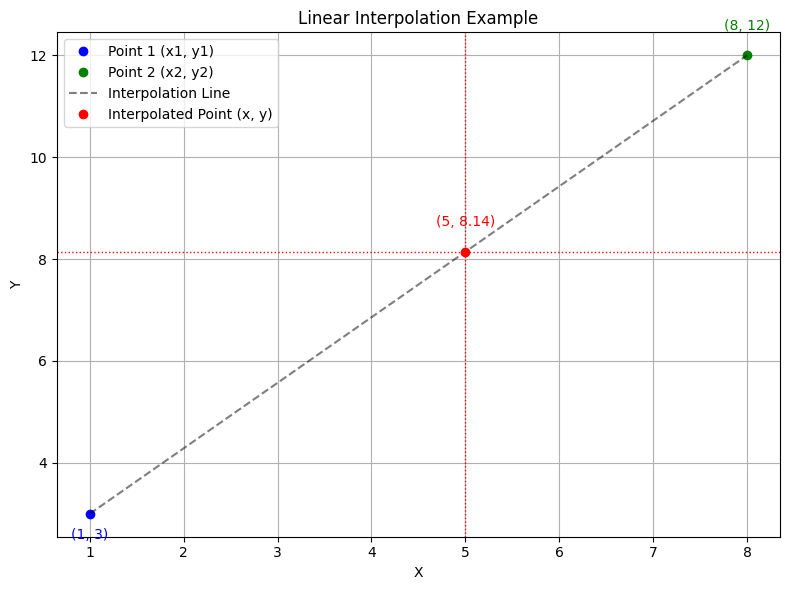

In [9]:
# Plotting
plt.figure(figsize=(8, 6))

# Plot the two original points
plt.plot(*x1y1, 'bo', label='Point 1 (x1, y1)')
plt.plot(*x2y2, 'go', label='Point 2 (x2, y2)')

# Plot the line between the known points
plt.plot([x1y1[0], x2y2[0]], [x1y1[1], x2y2[1]], 'k--', alpha=0.5, label='Interpolation Line')

# Plot the interpolated point
plt.plot(x, y, 'ro', label='Interpolated Point (x, y)')
plt.axvline(x, color='r', linestyle=':', linewidth=1)
plt.axhline(y, color='r', linestyle=':', linewidth=1)

# Label the points
plt.text(x1y1[0], x1y1[1]-0.5, f"{x1y1}", ha='center', color='blue')
plt.text(x2y2[0], x2y2[1]+0.5, f"{x2y2}", ha='center', color='green')
plt.text(x, y+0.5, f"({x}, {y:.2f})", ha='center', color='red')

# Axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Interpolation Example')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Bilinear Interpolation

- This is an extension of the linear interpolation but with the 2D space. Technically it would look like "3D".
- It approximates the value at a certain point within a grid by sampling the coordinates with values of four other grid points.
- The bilinear interpolation formula combines two linear interpolations to compute an estimate in a 2D space.
- Suppose you have a rectangular grid with points $(x_1, y_1)$, $(x_2, y_1)$, $(x_1, y_2)$, $(x_2, y_2)$, and you want to estimate the value at point $(x, y)$ where $x_1 \leq  x \leq x_2$ and $y_1 \leq y \leq y_2$
- The main function would be:

$$ f(x,y) = \frac{\left(x_2-x\right)\left(y_2-y\right)}{\left(x_2-x_1\right)\left(y_2-y_1\right)}Q_{11} + \frac{\left(x-x_1\right)\left(y_2-y\right)}{\left(x_2-x_1\right)\left(y_2-y_1\right)}Q_{21} + \frac{\left(x_2-x\right)\left(y-y_1\right)}{\left(x_2-x_1\right)\left(y_2-y_1\right)}Q_{12} + \frac{\left(x-x_1\right)\left(y-y_1\right)}{\left(x_2-x_1\right)\left(y_2-y_1\right)}Q_{22}$$

- Where:
$$Q_{11} = f(x_1,y_1)$$
$$Q_{21} = f(x_2,y_1)$$
$$Q_{12} = f(x_1,y_2)$$
$$Q_{22} = f(x_2,y_2)$$

- This formula involves a weighted average of the four surrounding points, ensuring that the closer a point is to the target, the more influence it has on the interpolated result.

# Simple Example

In [13]:
x1, y1, x2, y2 = 3, 3, 8, 8
q11, q12, q21, q22 = 10, 15, 20, 25
x, y = 4, 5

def bilinear_interpolate (x, y, x1, y1, x2 ,y2, q11, q12, q21, q22):
    p1 = (((x2-x)*(y2-y)) / ((x2-x1)*(y2-y1)))*q11
    p2 = (((x-x1)*(y2-y)) / ((x2-x1)*(y2-y1)))*q21
    p3 = (((x2-x)*(y-y1)) / ((x2-x1)*(y2-y1)))*q12
    p4 = (((x-x1)*(y-y1)) / ((x2-x1)*(y2-y1)))*q22
    z = p1 + p2 + p3 + p4
    return z

z = bilinear_interpolate(x, y, x1, y1, x2 ,y2, q11, q12, q21, q22)

print(f"Interpolated y: {z}")

Interpolated y: 14.0


# Simple Visualization

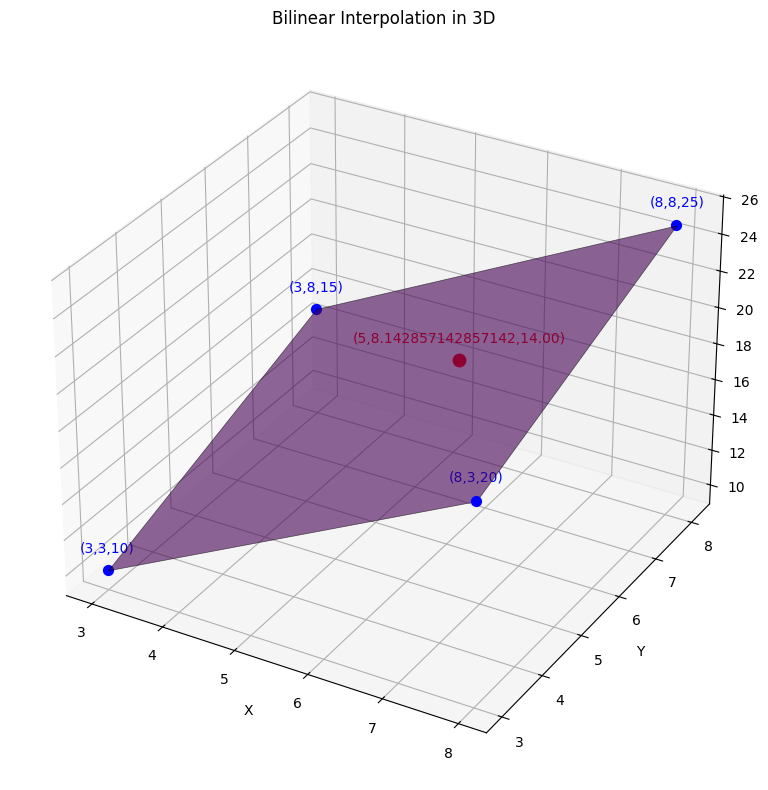

In [18]:
# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Grid for surface
X = np.array([[x1, x2], [x1, x2]])
Y = np.array([[y1, y1], [y2, y2]])
Z = np.array([[q11, q21], [q12, q22]])

# Plot the surface
ax.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis', edgecolor='k', linewidth=0.5)

# Plot the four corner points
corner_points = [(x1, y1, q11), (x1, y2, q12), (x2, y1, q21), (x2, y2, q22)]
for xi, yi, zi in corner_points:
    ax.scatter(xi, yi, zi, color='blue', s=50)
    ax.text(xi, yi, zi + 1, f"({xi},{yi},{zi})", color='blue', ha='center')

# Plot the interpolated point
ax.scatter(x, y, z, color='red', s=80)
ax.text(x, y, z + 1, f"({x},{y},{z:.2f})", color='red', ha='center')

# Axes labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Bilinear Interpolation in 3D')

plt.tight_layout()
plt.show()

# Bilinear Interpolation for Upscaling Images

- The same concept is applied to upscaling images.
- For example, if we try to up-scale 32x32 CIFAR images to 224x224 such that it fits inside models that were trained for ImageNet (i.e. ImageNet used 224x224 sizes)
- So how does upscaling work?

1. Compute scaling factor
- This is predetermined and used for mapping

2. Map output pixel to input space
- For each pixel in the 224×224 output:
  - Find where it maps back into the 32×32 input space (real-valued coordinates).
  - E.g., pixel `(i, j)` in the output maps to `(i / 7, j / 7)` in input space.

3. Find the 2×2 neighborhood
- Let’s say you’re computing output pixel at location `(i, j)` which maps to a fractional input location `(x, y)` like:
  $$ x = i / 7 = 50 / 7 ≈ 7.14 $$
  $$ y = j / 7 = 100 / 7 ≈ 14.28 $$
- This will allow us to find the surrounding integer grid points from the input:
  $$ (x_0,y_0) = (7,14) $$
  $$ (x_1, y_1) = (8, 15)$$
- The points are in between the integer interval around the compute $(x,y)$. So technically the $(x_0,y_0) \leftarrow \textrm{floor}(x,y)$ and $(x_1,y_1) \leftarrow \textrm{ceil}(x,y)$

4. Compute weights for each neighbor
- Let $dx = x-x_0 = 0.14$ and $dy = y - y_0 = 0.28$
- $w_{00} = (1 - dx) \times (1 - dy) = 0.6192$
- $w_{01} = (1 - dx) \times dy = 0.9608$
- $w_{10} = dx \times (1 - dy) = 0.1008$
- $w_{11} = dx \times dy = 0.0392$

5. Calculate the interpolated pixel value:
$$ o[i,j] = i[x_0,y_0]w_{00} + i[x_0,y_1]w_{01} + i[x_1,y_0]w_{10} + i[x_1,y_1]w_{11} $$

- Where $i[x,y]$ is the input value at the given $(x,y)$ pixel coordinate of the input

# Main References
- https://www.geeksforgeeks.org/what-is-bilinear-interpolation/